In [0]:
# run this only once while using google colaboratory

from fastai.vision import *
from google.colab import files
files.upload()

{}

In [0]:
# extracting the uploaded .rar file according to the compression structure

!unrar x LDA.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from LDA.rar

Creating    LDA                                                       OK
Creating    LDA/train                                                 OK
Creating    LDA/train/bad                                             OK
Extracting  LDA/train/bad/A11I1418.JPG.jpg                                 0%  OK 
Extracting  LDA/train/bad/A11I1419.JPG.jpg                                 0%  OK 
Extracting  LDA/train/bad/A11I1421.JPG.jpg                                 0%  OK 
Extracting  LDA/train/bad/A11I1422.JPG.jpg                                 1%  OK 
Extracting  LDA/train/bad/A11I1429.JPG.jpg                                 1%  OK 
Extracting  LDA/train/bad/A11I1430.JPG.jpg                                 1%  2%  OK 
Extracting  LDA/train/bad/A11I1432.JPG.jpg                                 2%  OK 
Extracting  LDA/train/bad/A11I1434.

In [0]:
# creating the data bunch from the folder just extracted in the above cell. 

# we also apply some preprocessing techniques like rezing the images to a constant size of (224 X 224 X 3) and using the "imagenet stats" for normalizing them 

np.random.seed(42)
data = ImageDataBunch.from_folder('.', train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# checking the classes which are present in the dataset
\
data.classes

['bad', 'good']

In [0]:
# printing the length of the training and the validation set. The training set is used for training the deep learning model 

# the validation set is used for testing the perfomrance of the model 


print(" Length of training set is {} and validation set is {} ".format(len(data.train_ds), len(data.valid_ds)))

 Length of training set is 309 and validation set is 77 


In [0]:
# creating the learner object ( This is based on a deep learning based image classification architecture known as ResNet34 )
# the objective is to perform deep learning using lesser data and for that we use efficient transfer learning techniques without forgetting more general concepts


learner = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
# dont run this ..... takes 1.5 hrs to run 

# this finds the best leanring rate to start the training process

learner.lr_find()

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

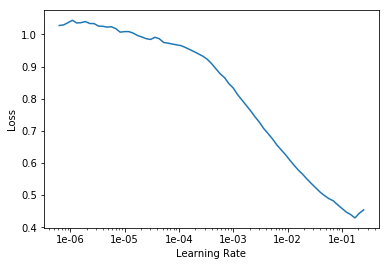

In [0]:
# if u havent run the previous cell then dont run this cell

learner.recorder.plot()

In [0]:
# finetuning the last layers of the model

learner.fit_one_cycle(5, 1e-2, moms=(0.9, 0.9))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.007439,0.676391,0.394737,0.605263,01:05
1,0.618192,1.910026,0.447368,0.552632,01:05
2,0.451338,3.497406,0.447368,0.552632,01:04
3,0.355482,3.286746,0.447368,0.552632,01:05
4,0.301846,3.060633,0.421053,0.578947,01:05


In [0]:
learner.fit_one_cycle(5, 5e-3, moms=(0.9, 0.9))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.121439,2.356215,0.394737,0.605263,01:05
1,0.115853,1.473339,0.236842,0.763158,01:05
2,0.088989,1.127086,0.210526,0.789474,01:05
3,0.069601,0.876372,0.131579,0.868421,01:04
4,0.061848,0.766308,0.105263,0.894737,01:05


In [0]:
# freezing subsequent lower layers of the model apart from the last 2 layers of the model 

learner.freeze_to(-2)

In [0]:
# finetuning the model again based on the above mentioned training conditions

learner.fit_one_cycle(5, 1e-4, moms=(0.9, 0.9))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.129792,0.480295,0.105263,0.894737,01:16
1,0.081323,0.043911,0.026316,0.973684,01:16
2,0.068873,0.053633,0.052632,0.947368,01:16
3,0.053327,0.069522,0.052632,0.947368,01:15
4,0.043276,0.067467,0.052632,0.947368,01:16


In [0]:
# Freezing the learner layers from top to bottom

learner.unfreeze()
learner.fit_one_cycle(5, slice(1e-7, 5e-4), moms=(0.9, 0.9))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003308,0.059486,0.052632,0.947368,01:26
1,0.006555,0.080389,0.052632,0.947368,01:26
2,0.013637,0.104505,0.052632,0.947368,01:26
3,0.017378,0.094352,0.052632,0.947368,01:26
4,0.014100,0.085830,0.052632,0.947368,01:26


In [0]:
# Gathering the predictions obtained on the validation set 

preds,y, losses = learner.get_preds(with_loss=True)


In [0]:
# gathering the mathematical scores for classifcation done on the validation 

interp  = ClassificationInterpretation(learn = learner, probs = preds, y_true = y, losses =losses)

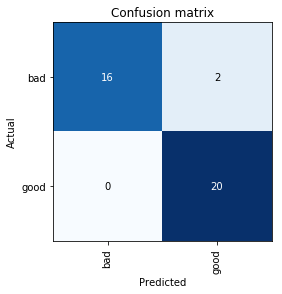

In [0]:
# plotting the confusion matrix

interp.plot_confusion_matrix()

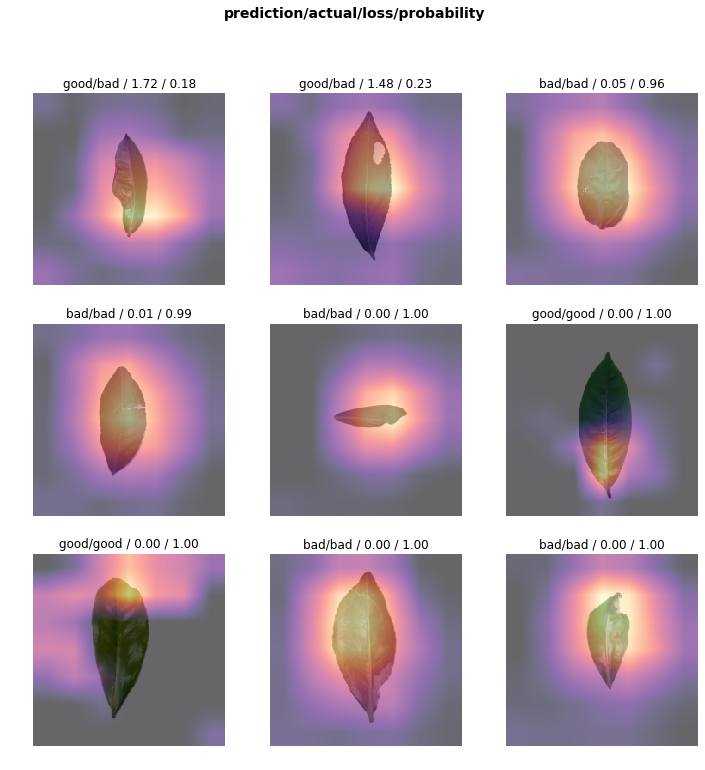

In [0]:
# getting few predictions for better understanding 

interp.plot_top_losses(k=9)